# Bike share case study

The case study would be using Multiple Linear Regrrssion method. And the steps involved is 
1. Read , understand and visualize the data
2. Prepare the data for modeling(train-test split, rescaling, etc)
2. Training the model
4. Residual Analysis
5. Prediction and evaluation on test set

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Step 1: Read Understand and vizualize the data

In [2]:
#Read the data
days = pd.read_csv("day.csv")
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#shapre
days.shape

(730, 16)

In [4]:
#info
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#describe
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Converting columns with codes into categorical variables

In [7]:
#convert season
days['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)

In [8]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#convert weekday
days['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}, inplace=True)

In [10]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#convert weathersit- note- we take only the first few words for each desciptios, for ease of plotting, column name when we create dummy variables, etc
days['weathersit'].replace({1: "Clear", 
                            2: "Mist", 
                            3: "Light Snow",
                            4: "Heavy Rain"} , inplace=True)

In [12]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
days['workingday'].replace({0: "Non working day", 1: "working day"} , inplace=True)

In [14]:
days['yr'].replace({0: "2018", 1: "2019"} , inplace=True)

In [15]:
#drop columns

In [16]:
#drop insatnt column
days.drop('instant', axis=1, inplace=True)

In [17]:
#drop dteday
days.drop('dteday', axis=1, inplace=True)

In [18]:
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,1,0,Saturday,Non working day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,1,0,Sunday,Non working day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,1,0,Monday,working day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,1,0,Tuesday,working day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,1,0,Wednesday,working day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#drop casual and registered
days_new = days.drop(['casual','registered'], axis=1) 
# creating a new dataframe, as I want to see if weather, weekday, holiday, etc has any impact on number of casual user/registered users 

In [20]:
days_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,Non working day,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,Sunday,Non working day,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,Monday,working day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,Tuesday,working day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,Wednesday,working day,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
days_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [22]:
#visualize data

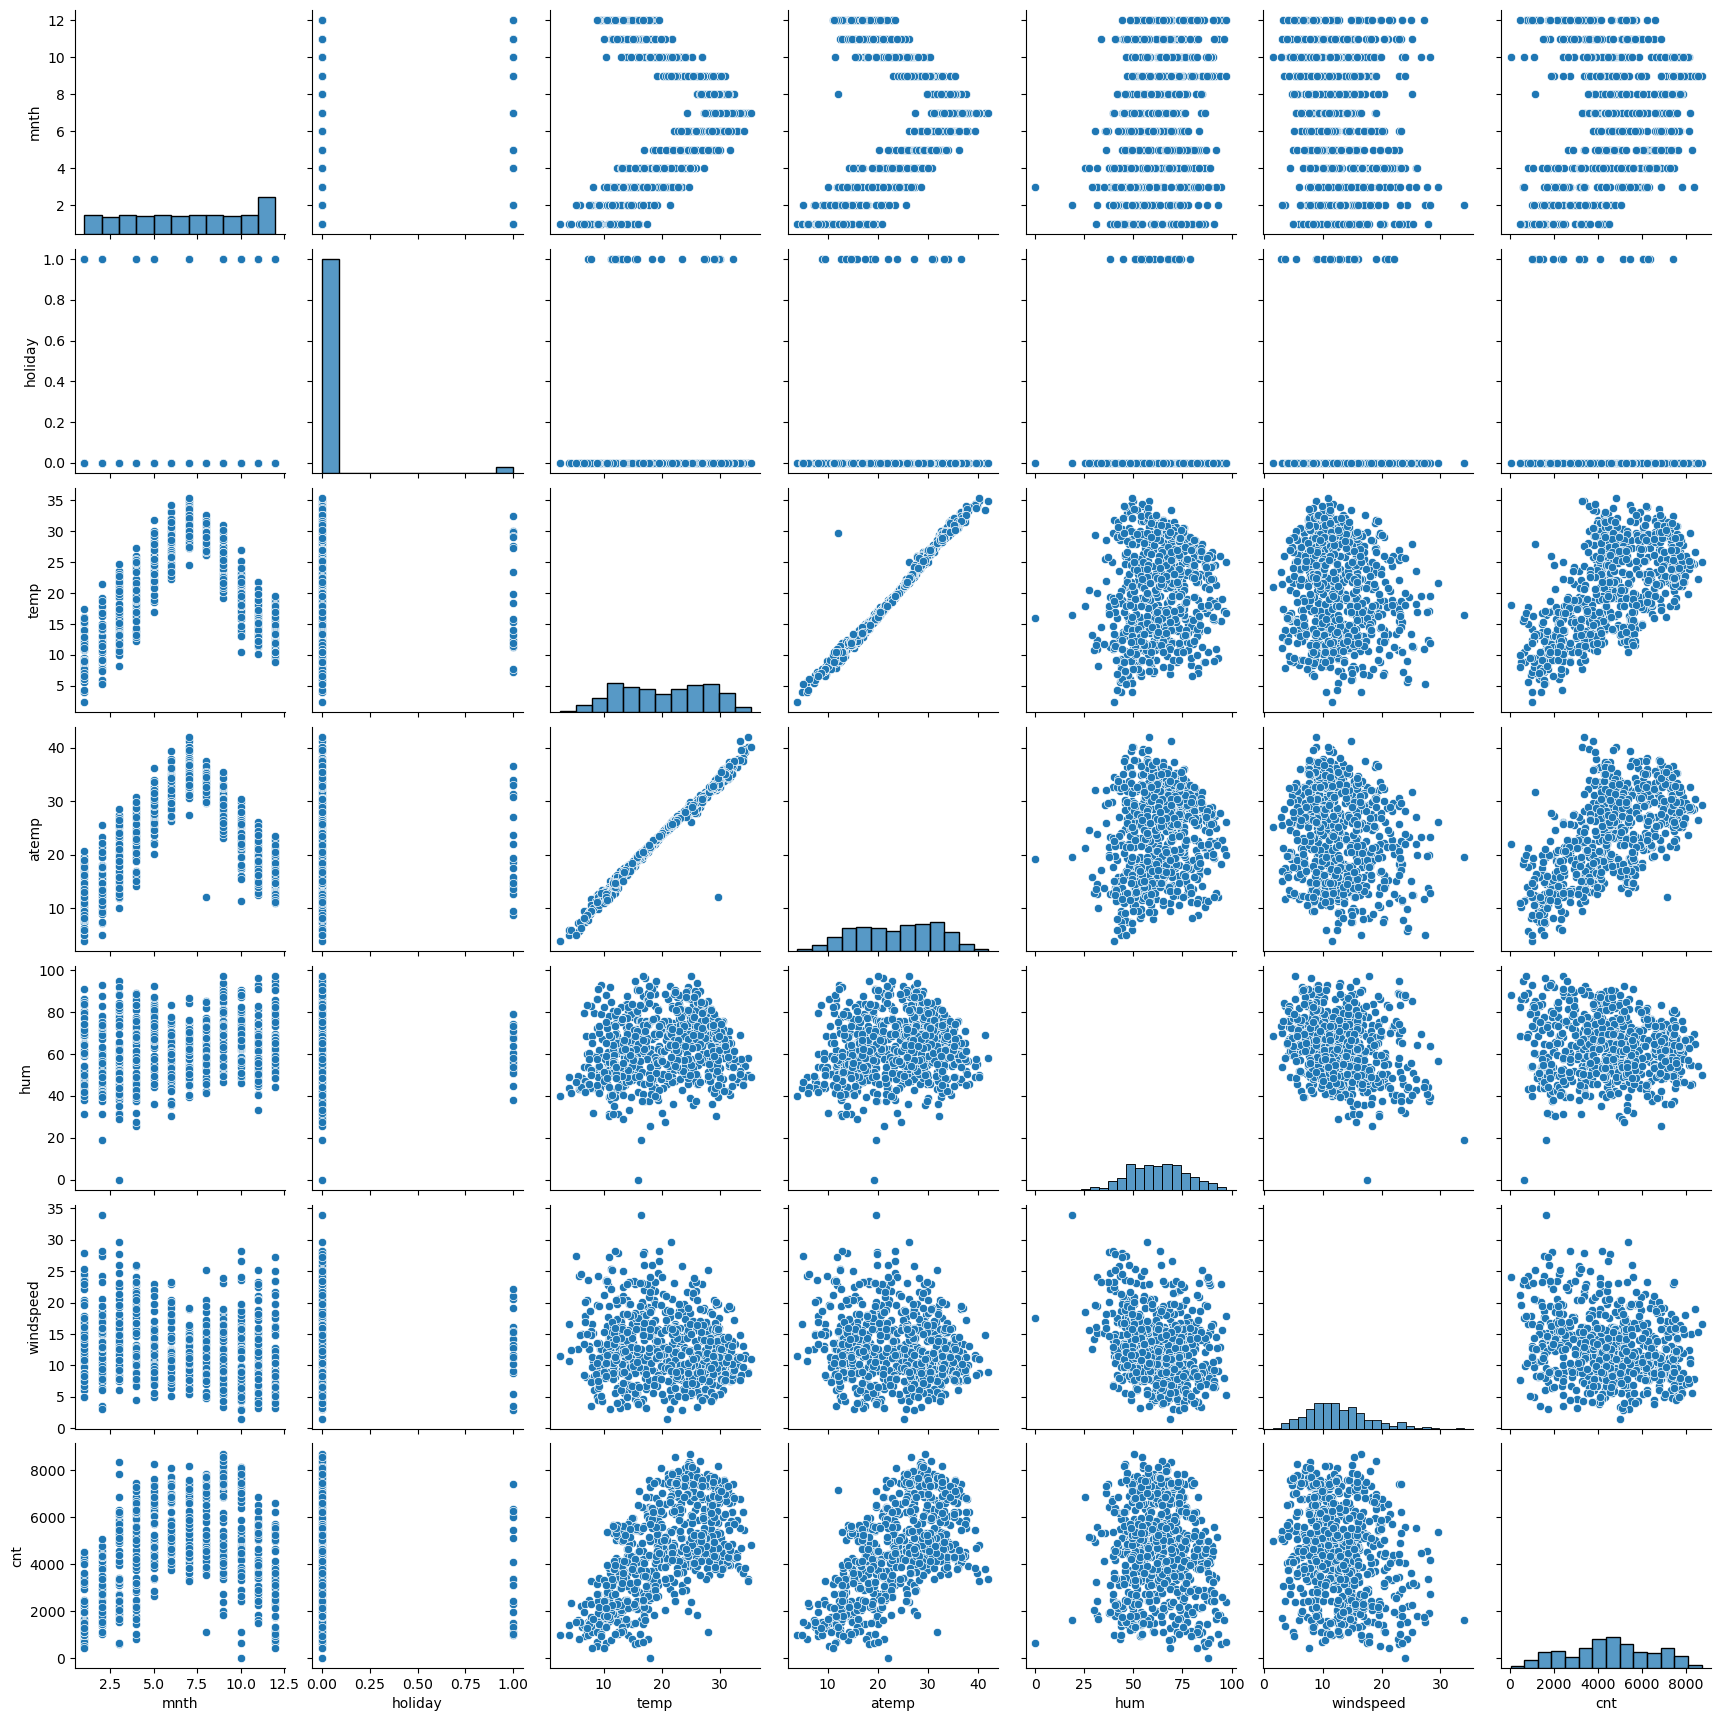

In [23]:
#Pair Plot
sns.pairplot(days_new)
plt.show()

In [24]:
#From above plots- temp and atemp appear to have a linear relation with count. 
#Next let's see the box plot to determine relation of count with categorical variobles 

<Axes: xlabel='mnth', ylabel='cnt'>

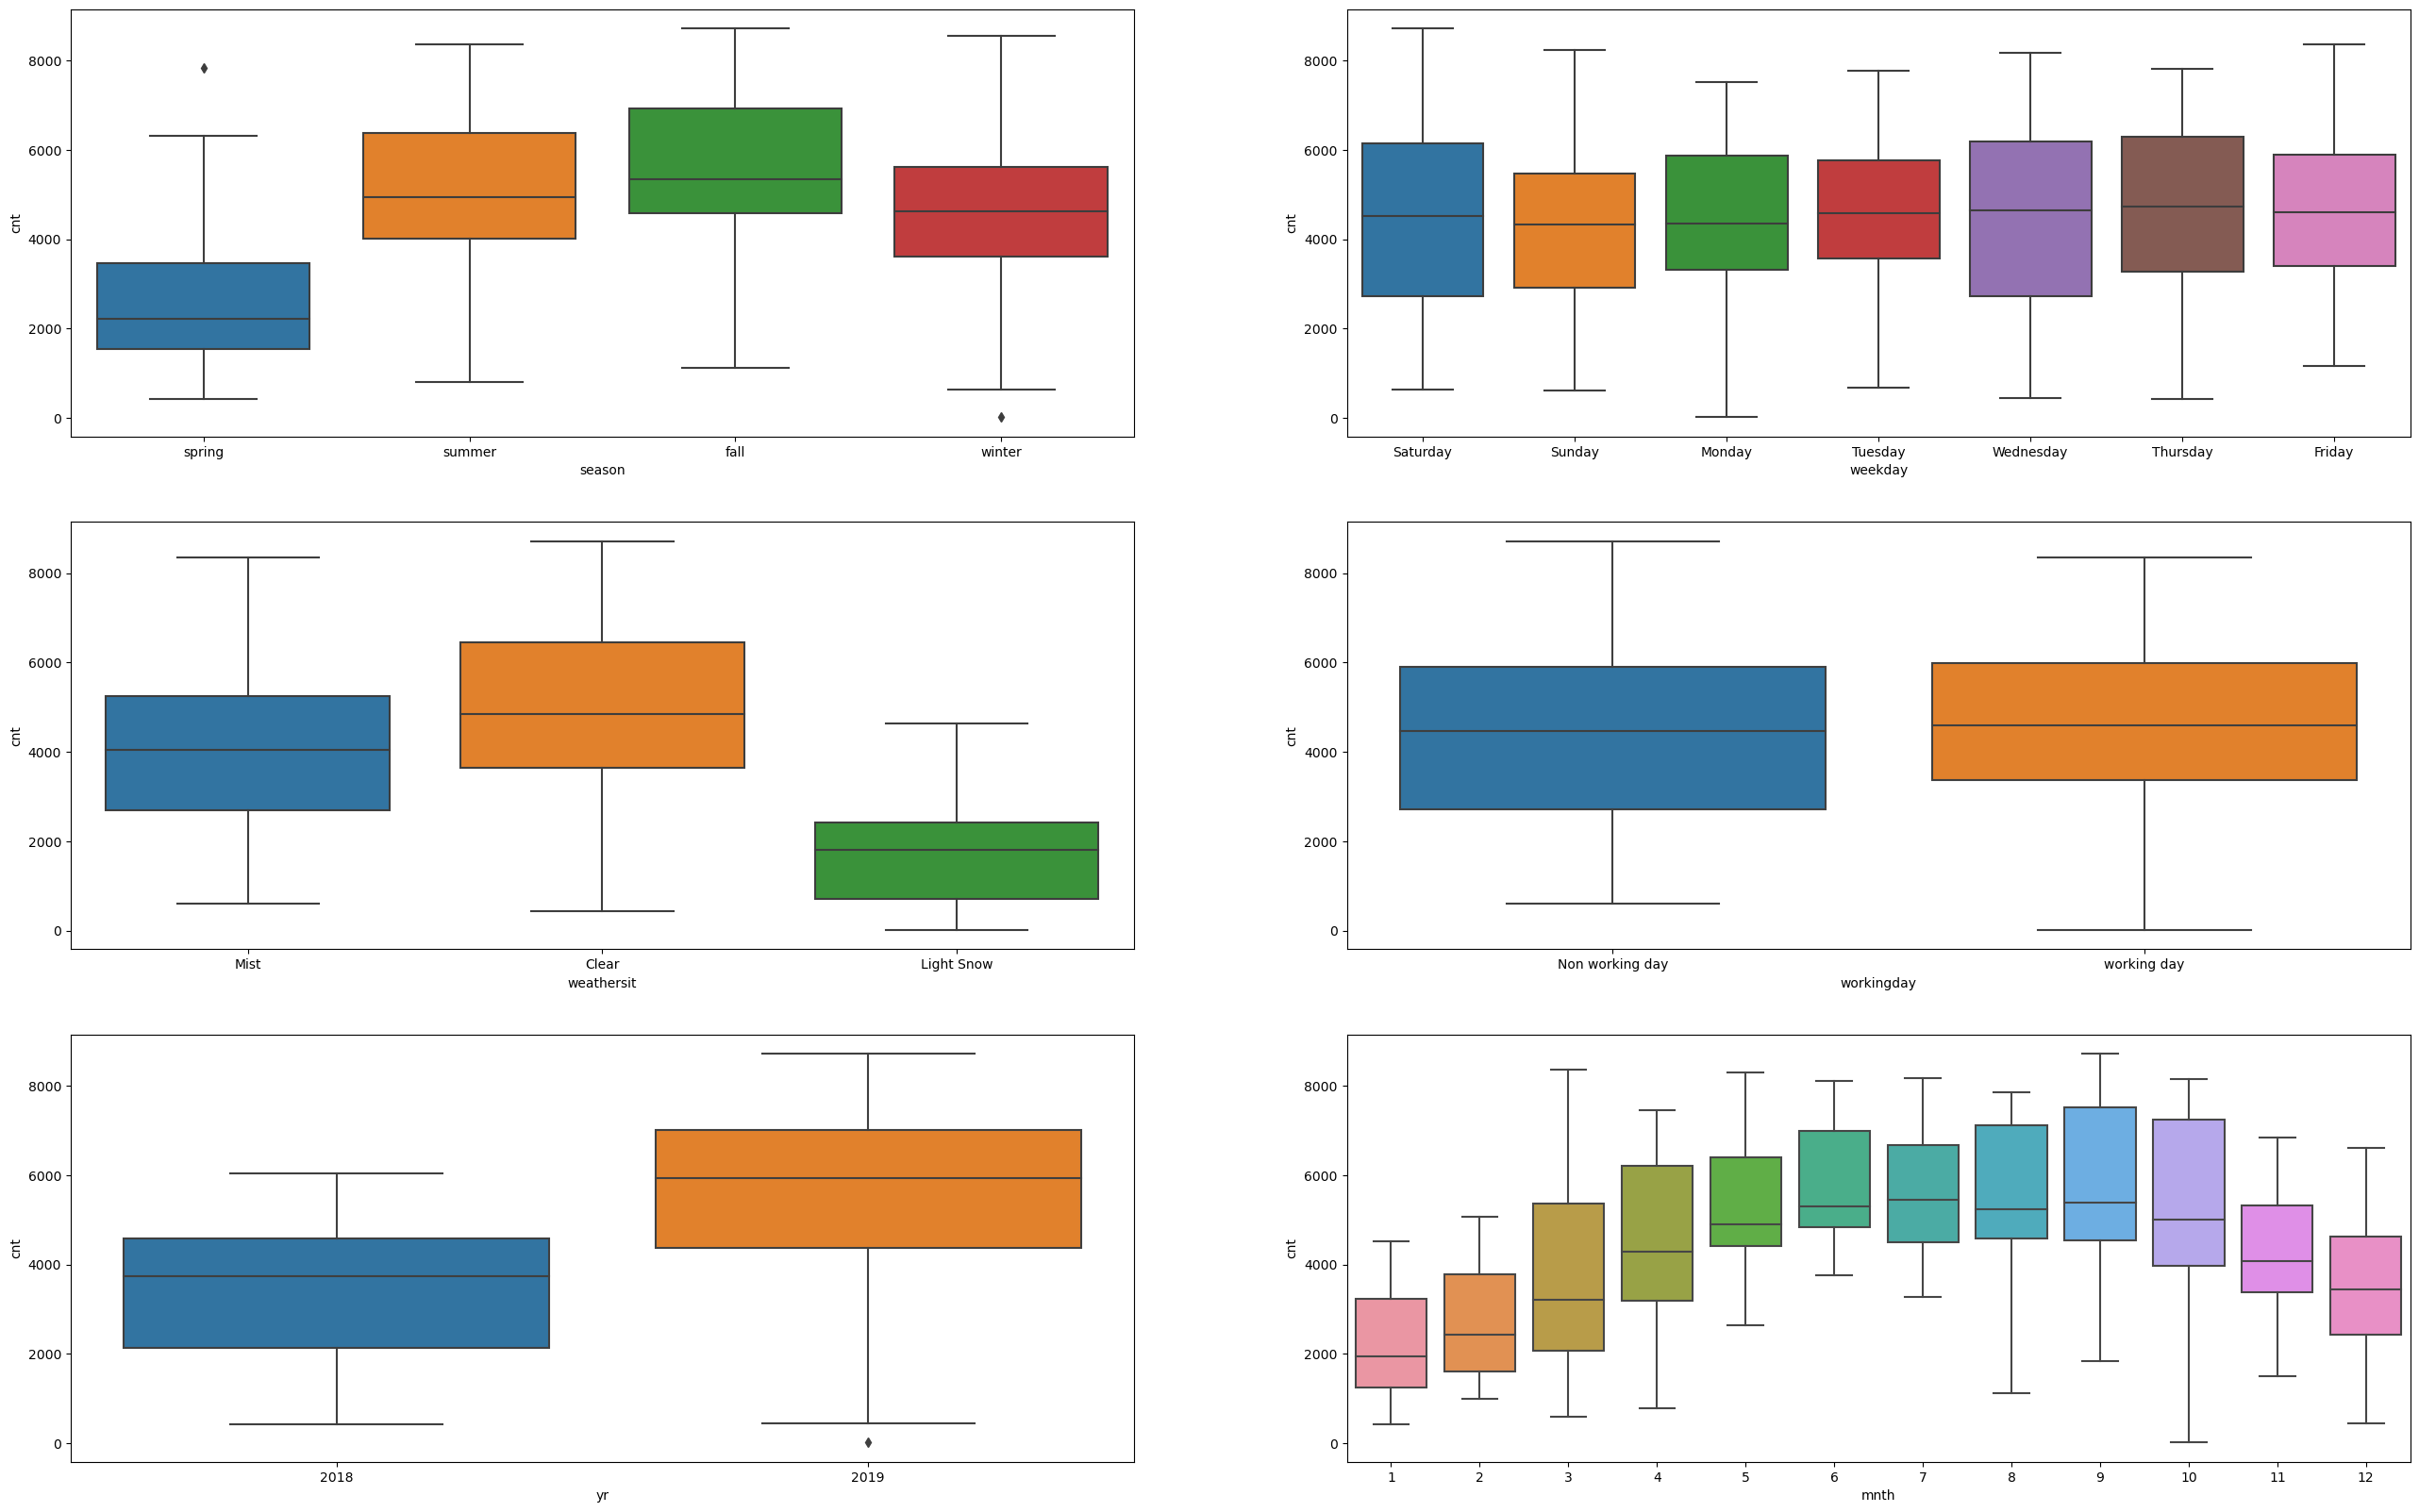

In [25]:
#visualizing categorical variable in box plots
plt.figure(figsize=(32,20))
plt.subplot(3,2,1)
sns.boxplot(x='season', y='cnt', data=days_new)

plt.subplot(3,2,2)
sns.boxplot(x='weekday', y='cnt', data=days_new)

plt.subplot(3,2,3)
sns.boxplot(x='weathersit', y='cnt', data=days_new)

plt.subplot(3,2,4)
sns.boxplot(x='workingday', y='cnt', data=days_new)

plt.subplot(3,2,5)
sns.boxplot(x='yr', y='cnt', data=days_new)

plt.subplot(3,2,6)
sns.boxplot(x='mnth', y='cnt', data=days_new)

In [26]:
#From the above box plots- it appears spring has the least usage of bikes. Summer and fall has almost same usage. Winter has a little lesser usage
# The median usage on all weekdays is same. 
#Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"-> this weather condition significantly decreases the usa

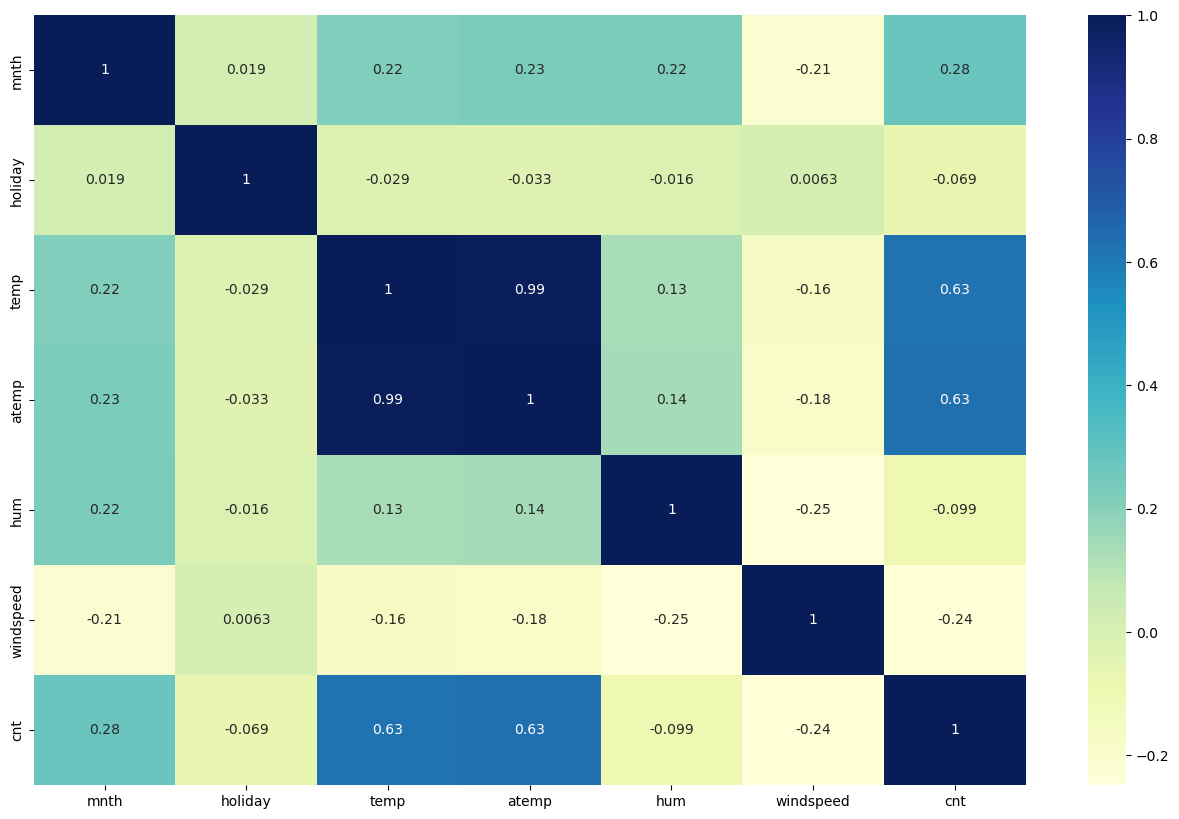

In [27]:
#PLot correlation
plt.figure(figsize = (16, 10))
sns.heatmap(days_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [28]:
#from the above correlation map- it is evident that temp and etemp are hihhly correlated to cnt.
#also, correaltion between temp and atemp is almost 1(0.99)-> so temp can be dropped.

In [29]:
#drop temp
days_new = days_new.drop('temp', axis=1) 

In [30]:
days_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,Non working day,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,Sunday,Non working day,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,Monday,working day,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,Tuesday,working day,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,Wednesday,working day,Clear,11.46350,43.6957,12.522300,1600


##### Step 2: Preparing data
- Encoding
    - convert binary categorical data to 1 or 0
    - other categorical variables to dummy variables
- split into test train
- rescaling of variable##### 

In [31]:
days_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,Non working day,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,Sunday,Non working day,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,Monday,working day,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,Tuesday,working day,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,Wednesday,working day,Clear,11.46350,43.6957,12.522300,1600


In [32]:
#convert workingday to 1 or 0
days_new['workingday'].replace({'Non working day':0,"working day":1}, inplace=True)

In [33]:
days_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [34]:
#convert year to 1 or 0
days_new['yr'].replace({'2018':0,"2019":1}, inplace=True)

In [35]:
#dummy variables for columns season,mnth, weekday,weathersit

In [36]:
season_dum      = pd.get_dummies(days_new['season'],    drop_first = True)
mnth_dum        = pd.get_dummies(days_new['mnth'],      drop_first = True)
weekday_dum     = pd.get_dummies(days_new['weekday'],   drop_first = True)
weathersit_dum  = pd.get_dummies(days_new['weathersit'],drop_first = True)

In [37]:
#concatenate the dummy columns into days_new
days_new= pd.concat([days_new,season_dum], axis=1)
days_new= pd.concat([days_new,mnth_dum], axis=1)
days_new= pd.concat([days_new,weekday_dum], axis=1)
days_new= pd.concat([days_new,weathersit_dum], axis=1)

In [38]:
days_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,spring,0,1,0,Saturday,0,Mist,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,1,0,Sunday,0,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,1,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,1,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#delete the original columns for which dummy columns were created

days_new = days_new.drop(['season','mnth', 'weekday','weathersit'], axis=1)

In [40]:
days_new.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
days_new.shape

(730, 29)

In [42]:
days_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  2           730 non-null    uint8  
 11  3           730 non-null    uint8  
 12  4           730 non-null    uint8  
 13  5           730 non-null    uint8  
 14  6           730 non-null    uint8  
 15  7           730 non-null    uint8  
 16  8           730 non-null    uint8  
 17  9           730 non-null    uint8  
 18  10          730 non-null    uint8  
 19  11          730 non-null    u

In [325]:
#Convert column Names to string
days_new.columns = days_new.columns.astype(str)
days_new.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

##### Split into train and test sets

In [326]:
df_train, df_test = train_test_split(days_new, train_size=0.7, random_state = 100)

In [327]:
df_train.shape

(510, 29)

In [328]:
df_test.shape

(220, 29)

##### Rescaling the features
using min max scaler, rescale the numeric variables

In [329]:
#1. Instantiate a object
scaler = MinMaxScaler()

#create numeric variables list
num_vars=['atemp', 'hum','windspeed', 'cnt']

#2 fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Step 3: Train the Model
As the number of columns is high, we would start with the RFE method. and use mixed approach to train the model

In [208]:
y_train = df_train.pop('cnt')
X_train = df_train

In [209]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [210]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,2,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
X_train.columns

Index([        'yr',    'holiday', 'workingday',      'atemp',        'hum',
        'windspeed',     'spring',     'summer',     'winter',            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
           'Monday',   'Saturday',     'Sunday',   'Thursday',    'Tuesday',
        'Wednesday', 'Light Snow',       'Mist'],
      dtype='object')

In [212]:
#Convert column Names to string
X_train.columns = X_train.columns.astype(str)
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

In [213]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm ,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [214]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('2', False, 10),
 ('3', False, 4),
 ('4', False, 3),
 ('5', True, 1),
 ('6', True, 1),
 ('7', False, 7),
 ('8', False, 2),
 ('9', True, 1),
 ('10', False, 5),
 ('11', False, 8),
 ('12', False, 9),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 12),
 ('Wednesday', False, 13),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [215]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', '5', '6', '9', 'Saturday', 'Sunday', 'Light Snow', 'Mist'],
      dtype='object')

In [216]:
X_train.columns[~rfe.support_]

Index(['summer', '2', '3', '4', '7', '8', '10', '11', '12', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [217]:
X_train_rfe = X_train[col]

In [218]:
#Build model
#adding constant
X_train_sm = sm.add_constant(X_train_rfe)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [219]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', '5', '6', '9', 'Saturday', 'Sunday', 'Light Snow', 'Mist'],
      dtype='object')

In [220]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.06e-185
Time:                        23:47:01   Log-Likelihood:                 503.34
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     495   BIC:                            -913.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2474      0.026      9.640      0.000       0.197       0.298
yr             0.2342      0.008     28.444      0.000       0.218       0.250
holiday       -0.0018      0.022     -0.083      0.934      -0.044       0.041
workingday     0.0948      0.009     10.033      0.000       0.076       0.113
atemp          0.4474      0.031     14.367      0.000       0.386       0.509
hum           -0.1498      0.039     -3.862      0.000      -0.226      -0.074
windspeed     -0.1483      0.026     -5.717      0.000      -0.199      -0.097
spring        -0.1062      0.015     -6.908      0.000      -0.136      -0.076
winter         0.0614      0.013      4.746      0.000       0.036       0.087
5              0.0505      0.016      3.136      0.002       0.019       0.082
6              0.0229      0.017      1.372      0.171      -0.010       0.056
9              0.0843      0.016      5.309      0.000       0.053       0.115
Saturday       0.1047      0.012      9.030      0.000       0.082       0.128
Sunday         0.0497      0.012      4.066      0.000       0.026       0.074
Light Snow    -0.2446      0.027     -9.099      0.000      -0.297      -0.192
Mist          -0.0572      0.011     -5.358      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       72.017   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.471
Skew:                          -0.656   Prob(JB):                     1.33e-48
Kurtosis:                       5.942   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [221]:
#VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,workingday,40.82
11,Saturday,9.96
12,Sunday,9.69
3,atemp,2.66
6,spring,2.65
1,holiday,2.53
4,hum,1.94
7,winter,1.89
14,Mist,1.57
13,Light Snow,1.26


In [222]:
#as a rule, first we drop the high p value items, that  is column 'holiday'
X = X_train_rfe.drop('holiday', axis=1)

In [223]:
#rebuild the model
X_train_sm=sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.245584
yr            0.234249
workingday    0.096542
atemp         0.447425
hum          -0.149762
windspeed    -0.148253
spring       -0.106243
winter        0.061355
5             0.050515
6             0.022924
9             0.084285
Saturday      0.106533
Sunday        0.051457
Light Snow   -0.244595
Mist         -0.057236
dtype: float64

In [224]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.06e-185
Time:                        23:47:02   Log-Likelihood:                 503.34
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     495   BIC:                            -913.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2456      0.040      6.081      0.000       0.166       0.325
yr             0.2342      0.008     28.444      0.000       0.218       0.250
workingday     0.0965      0.026      3.698      0.000       0.045       0.148
atemp          0.4474      0.031     14.367      0.000       0.386       0.509
hum           -0.1498      0.039     -3.862      0.000      -0.226      -0.074
windspeed     -0.1483      0.026     -5.717      0.000      -0.199      -0.097
spring        -0.1062      0.015     -6.908      0.000      -0.136      -0.076
winter         0.0614      0.013      4.746      0.000       0.036       0.087
5              0.0505      0.016      3.136      0.002       0.019       0.082
6              0.0229      0.017      1.372      0.171      -0.010       0.056
9              0.0843      0.016      5.309      0.000       0.053       0.115
Saturday       0.1065      0.028      3.863      0.000       0.052       0.161
Sunday         0.0515      0.028      1.856      0.064      -0.003       0.106
Light Snow    -0.2446      0.027     -9.099      0.000      -0.297      -0.192
Mist          -0.0572      0.011     -5.358      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       72.017   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.471
Skew:                          -0.656   Prob(JB):                     1.33e-48
Kurtosis:                       5.942   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,30.12
1,workingday,17.05
2,atemp,15.82
10,Saturday,4.60
11,Sunday,4.48
4,windspeed,4.46
5,spring,2.94
6,winter,2.31
13,Mist,2.28
0,yr,2.07


In [226]:
#humidity has a very high VIF. So drop humidity
X = X.drop('hum', axis=1)

In [227]:
X.head()

,yr,workingday,atemp,windspeed,spring,winter,5,6,9,Saturday,Sunday,Light Snow,Mist
576,1,1,0.766351,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0.200348,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,1,0,0,1
111,0,1,0.318819,0.380981,0,0,0,0,0,0,0,0,1


In [228]:
#rebuild the model
X_train_sm=sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.166143
yr            0.237549
workingday    0.097638
atemp         0.418363
windspeed    -0.121585
spring       -0.111567
winter        0.050778
5             0.040888
6             0.027536
9             0.079078
Saturday      0.109033
Sunday        0.049769
Light Snow   -0.285996
Mist         -0.080941
dtype: float64

In [229]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.19e-183
Time:                        23:47:03   Log-Likelihood:                 495.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1661      0.035      4.715      0.000       0.097       0.235
yr             0.2375      0.008     28.602      0.000       0.221       0.254
workingday     0.0976      0.026      3.688      0.000       0.046       0.150
atemp          0.4184      0.031     13.654      0.000       0.358       0.479
windspeed     -0.1216      0.025     -4.798      0.000      -0.171      -0.072
spring        -0.1116      0.016     -7.183      0.000      -0.142      -0.081
winter         0.0508      0.013      3.964      0.000       0.026       0.076
5              0.0409      0.016      2.534      0.012       0.009       0.073
6              0.0275      0.017      1.630      0.104      -0.006       0.061
9              0.0791      0.016      4.930      0.000       0.048       0.111
Saturday       0.1090      0.028      3.900      0.000       0.054       0.164
Sunday         0.0498      0.028      1.771      0.077      -0.005       0.105
Light Snow    -0.2860      0.025    -11.442      0.000      -0.335      -0.237
Mist          -0.0809      0.009     -9.131      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       72.032   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.027
Skew:                          -0.681   Prob(JB):                     4.97e-45
Kurtosis:                       5.783   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,workingday,13.45
2,atemp,11.36
3,windspeed,4.44
9,Saturday,3.83
10,Sunday,3.62
4,spring,2.53
0,yr,2.07
5,winter,1.88
12,Mist,1.59
7,6,1.29


In [231]:
#drop workingday, as it has a high VIF value
X = X.drop('workingday', axis=1)

In [232]:
#rebuild the model
#Add constant
X_train_sm=sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.259927
yr            0.238009
atemp         0.420455
windspeed    -0.123408
spring       -0.113695
winter        0.048181
5             0.042039
6             0.028620
9             0.075675
Saturday      0.015185
Sunday       -0.044031
Light Snow   -0.281408
Mist         -0.079132
dtype: float64

In [233]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.4
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.20e-181
Time:                        23:47:04   Log-Likelihood:                 488.87
No. Observations:                 510   AIC:                            -951.7
Df Residuals:                     497   BIC:                            -896.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.025     10.521      0.000       0.211       0.308
yr             0.2380      0.008     28.304      0.000       0.221       0.255
atemp          0.4205      0.031     13.553      0.000       0.360       0.481
windspeed     -0.1234      0.026     -4.810      0.000      -0.174      -0.073
spring        -0.1137      0.016     -7.234      0.000      -0.145      -0.083
winter         0.0482      0.013      3.720      0.000       0.023       0.074
5              0.0420      0.016      2.573      0.010       0.010       0.074
6              0.0286      0.017      1.673      0.095      -0.005       0.062
9              0.0757      0.016      4.667      0.000       0.044       0.108
Saturday       0.0152      0.012      1.295      0.196      -0.008       0.038
Sunday        -0.0440      0.012     -3.633      0.000      -0.068      -0.020
Light Snow    -0.2814      0.025    -11.132      0.000      -0.331      -0.232
Mist          -0.0791      0.009     -8.829      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       84.942   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.849
Skew:                          -0.785   Prob(JB):                     7.54e-56
Kurtosis:                       6.079   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,atemp,4.51
2,windspeed,3.91
0,yr,2.05
3,spring,1.71
11,Mist,1.53
4,winter,1.48
6,6,1.29
5,5,1.26
7,9,1.22
8,Saturday,1.22


In [235]:
#Saturday still has a high p value(>.05)- so lets drop and see how model behaves
X = X.drop('Saturday', axis=1)

In [236]:
#rebuild the model
#Add constant
X_train_sm=sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.262807
yr            0.237658
atemp         0.419748
windspeed    -0.122028
spring       -0.113768
winter        0.048350
5             0.041129
6             0.028783
9             0.075527
Sunday       -0.046792
Light Snow   -0.281246
Mist         -0.079095
dtype: float64

In [237]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.83e-182
Time:                        23:47:06   Log-Likelihood:                 488.01
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2628      0.025     10.674      0.000       0.214       0.311
yr             0.2377      0.008     28.258      0.000       0.221       0.254
atemp          0.4197      0.031     13.523      0.000       0.359       0.481
windspeed     -0.1220      0.026     -4.757      0.000      -0.172      -0.072
spring        -0.1138      0.016     -7.234      0.000      -0.145      -0.083
winter         0.0484      0.013      3.731      0.000       0.023       0.074
5              0.0411      0.016      2.518      0.012       0.009       0.073
6              0.0288      0.017      1.681      0.093      -0.005       0.062
9              0.0755      0.016      4.655      0.000       0.044       0.107
Sunday        -0.0468      0.012     -3.919      0.000      -0.070      -0.023
Light Snow    -0.2812      0.025    -11.119      0.000      -0.331      -0.232
Mist          -0.0791      0.009     -8.819      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       80.524   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.902
Skew:                          -0.731   Prob(JB):                     5.43e-55
Kurtosis:                       6.102   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,atemp,4.44
2,windspeed,3.87
0,yr,2.05
3,spring,1.69
10,Mist,1.53
4,winter,1.47
6,6,1.29
5,5,1.26
7,9,1.22
8,Sunday,1.17


In [239]:
#atemp has high VIF- so lets drop and see how model behaves
X = X.drop('atemp', axis=1)

In [240]:
#rebuild the model
#Add constant
X_train_sm=sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.549331
yr            0.248982
windspeed    -0.182811
spring       -0.259150
winter       -0.040174
5             0.036101
6             0.063270
9             0.100776
Sunday       -0.046146
Light Snow   -0.291033
Mist         -0.091274
dtype: float64

In [241]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          6.57e-150
Time:                        23:47:07   Log-Likelihood:                 408.25
No. Observations:                 510   AIC:                            -794.5
Df Residuals:                     499   BIC:                            -747.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5493      0.015     37.494      0.000       0.521       0.578
yr             0.2490      0.010     25.470      0.000       0.230       0.268
windspeed     -0.1828      0.030     -6.197      0.000      -0.241      -0.125
spring        -0.2592      0.013    -19.327      0.000      -0.285      -0.233
winter        -0.0402      0.013     -3.075      0.002      -0.066      -0.015
5              0.0361      0.019      1.893      0.059      -0.001       0.074
6              0.0633      0.020      3.200      0.001       0.024       0.102
9              0.1008      0.019      5.353      0.000       0.064       0.138
Sunday        -0.0461      0.014     -3.309      0.001      -0.074      -0.019
Light Snow    -0.2910      0.030     -9.854      0.000      -0.349      -0.233
Mist          -0.0913      0.010     -8.757      0.000      -0.112      -0.071
==============================================================================
Omnibus:                       39.353   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.804
Skew:                          -0.395   Prob(JB):                     1.57e-21
Kurtosis:                       4.971   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,windspeed,2.83
0,yr,1.77
2,spring,1.63
9,Mist,1.49
3,winter,1.46
4,5,1.18
7,Sunday,1.15
5,6,1.14
6,9,1.10
8,Light Snow,1.08


In [243]:
#windspeed has a high VIF- so lets drop and see how model behaves
X = X.drop('windspeed', axis=1)

In [244]:
#rebuild the model

#add constant
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490743
yr            0.248453
spring       -0.268835
winter       -0.035097
5             0.039401
6             0.066880
9             0.113206
Sunday       -0.046143
Light Snow   -0.309464
Mist         -0.090452
dtype: float64

In [245]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     164.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.89e-143
Time:                        23:47:08   Log-Likelihood:                 389.34
No. Observations:                 510   AIC:                            -758.7
Df Residuals:                     500   BIC:                            -716.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4907      0.012     42.292      0.000       0.468       0.514
yr             0.2485      0.010     24.517      0.000       0.229       0.268
spring        -0.2688      0.014    -19.471      0.000      -0.296      -0.242
winter        -0.0351      0.014     -2.596      0.010      -0.062      -0.009
5              0.0394      0.020      1.993      0.047       0.001       0.078
6              0.0669      0.020      3.264      0.001       0.027       0.107
9              0.1132      0.019      5.833      0.000       0.075       0.151
Sunday        -0.0461      0.014     -3.191      0.002      -0.075      -0.018
Light Snow    -0.3095      0.030    -10.158      0.000      -0.369      -0.250
Mist          -0.0905      0.011     -8.371      0.000      -0.112      -0.069
==============================================================================
Omnibus:                       42.189   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.044
Skew:                          -0.396   Prob(JB):                     4.68e-25
Kurtosis:                       5.155   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,yr,1.55
8,Mist,1.43
2,winter,1.32
1,spring,1.27
6,Sunday,1.14
3,5,1.12
5,9,1.09
4,6,1.08
7,Light Snow,1.05


In [247]:
#now lets add few variables not considered earlier and see if they impoves r squared value significantly
#choose from X_train.columns[~rfe.support_]

In [248]:
#add summer and check the model
X['summer'] = X_train['summer']

In [249]:
#rebuild the model

#add constant
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.525122
yr            0.248814
spring       -0.304980
winter       -0.069453
5             0.097655
6             0.092221
9             0.084144
Sunday       -0.046442
Light Snow   -0.304286
Mist         -0.086071
summer       -0.094796
dtype: float64

In [250]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          8.37e-149
Time:                        23:47:11   Log-Likelihood:                 405.63
No. Observations:                 510   AIC:                            -789.3
Df Residuals:                     499   BIC:                            -742.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5251      0.013     41.198      0.000       0.500       0.550
yr             0.2488      0.010     25.323      0.000       0.230       0.268
spring        -0.3050      0.015    -20.615      0.000      -0.334      -0.276
winter        -0.0695      0.014     -4.820      0.000      -0.098      -0.041
5              0.0977      0.022      4.503      0.000       0.055       0.140
6              0.0922      0.020      4.532      0.000       0.052       0.132
9              0.0841      0.019      4.318      0.000       0.046       0.122
Sunday        -0.0464      0.014     -3.313      0.001      -0.074      -0.019
Light Snow    -0.3043      0.030    -10.297      0.000      -0.362      -0.246
Mist          -0.0861      0.011     -8.194      0.000      -0.107      -0.065
summer        -0.0948      0.017     -5.738      0.000      -0.127      -0.062
==============================================================================
Omnibus:                       45.583   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.085
Skew:                          -0.336   Prob(JB):                     7.75e-35
Kurtosis:                       5.634   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
9,summer,2.20
0,yr,1.67
3,5,1.65
8,Mist,1.50
2,winter,1.37
1,spring,1.32
4,6,1.26
6,Sunday,1.14
5,9,1.10
7,Light Snow,1.06


In [252]:
#There is a slight increase in r squared value- however the VIF value goes beyong 2. So drop column summer.
#next add month 7
X = X.drop('summer', axis=1)

In [253]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490743
yr            0.248453
spring       -0.268835
winter       -0.035097
5             0.039401
6             0.066880
9             0.113206
Sunday       -0.046143
Light Snow   -0.309464
Mist         -0.090452
dtype: float64

In [254]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     164.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.89e-143
Time:                        23:47:12   Log-Likelihood:                 389.34
No. Observations:                 510   AIC:                            -758.7
Df Residuals:                     500   BIC:                            -716.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4907      0.012     42.292      0.000       0.468       0.514
yr             0.2485      0.010     24.517      0.000       0.229       0.268
spring        -0.2688      0.014    -19.471      0.000      -0.296      -0.242
winter        -0.0351      0.014     -2.596      0.010      -0.062      -0.009
5              0.0394      0.020      1.993      0.047       0.001       0.078
6              0.0669      0.020      3.264      0.001       0.027       0.107
9              0.1132      0.019      5.833      0.000       0.075       0.151
Sunday        -0.0461      0.014     -3.191      0.002      -0.075      -0.018
Light Snow    -0.3095      0.030    -10.158      0.000      -0.369      -0.250
Mist          -0.0905      0.011     -8.371      0.000      -0.112      -0.069
==============================================================================
Omnibus:                       42.189   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.044
Skew:                          -0.396   Prob(JB):                     4.68e-25
Kurtosis:                       5.155   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
#add month 2
X['2'] = X_train['2']

In [256]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490741
yr            0.248447
spring       -0.266709
winter       -0.035108
5             0.039414
6             0.066876
9             0.113213
Sunday       -0.046010
Light Snow   -0.309230
Mist         -0.090509
2            -0.007744
dtype: float64

In [257]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          6.10e-142
Time:                        23:47:12   Log-Likelihood:                 389.40
No. Observations:                 510   AIC:                            -756.8
Df Residuals:                     499   BIC:                            -710.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4907      0.012     42.255      0.000       0.468       0.514
yr             0.2484      0.010     24.494      0.000       0.229       0.268
spring        -0.2667      0.015    -17.559      0.000      -0.297      -0.237
winter        -0.0351      0.014     -2.595      0.010      -0.062      -0.009
5              0.0394      0.020      1.992      0.047       0.001       0.078
6              0.0669      0.021      3.261      0.001       0.027       0.107
9              0.1132      0.019      5.829      0.000       0.075       0.151
Sunday        -0.0460      0.014     -3.178      0.002      -0.074      -0.018
Light Snow    -0.3092      0.030    -10.139      0.000      -0.369      -0.249
Mist          -0.0905      0.011     -8.368      0.000      -0.112      -0.069
2             -0.0077      0.023     -0.337      0.736      -0.053       0.037
==============================================================================
Omnibus:                       42.438   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.067
Skew:                          -0.405   Prob(JB):                     7.62e-25
Kurtosis:                       5.138   Cond. No.                         7.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
#month 2 has high p value so drop it
X = X.drop('2', axis=1)

In [259]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490743
yr            0.248453
spring       -0.268835
winter       -0.035097
5             0.039401
6             0.066880
9             0.113206
Sunday       -0.046143
Light Snow   -0.309464
Mist         -0.090452
dtype: float64

In [260]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     164.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.89e-143
Time:                        23:47:13   Log-Likelihood:                 389.34
No. Observations:                 510   AIC:                            -758.7
Df Residuals:                     500   BIC:                            -716.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4907      0.012     42.292      0.000       0.468       0.514
yr             0.2485      0.010     24.517      0.000       0.229       0.268
spring        -0.2688      0.014    -19.471      0.000      -0.296      -0.242
winter        -0.0351      0.014     -2.596      0.010      -0.062      -0.009
5              0.0394      0.020      1.993      0.047       0.001       0.078
6              0.0669      0.020      3.264      0.001       0.027       0.107
9              0.1132      0.019      5.833      0.000       0.075       0.151
Sunday        -0.0461      0.014     -3.191      0.002      -0.075      -0.018
Light Snow    -0.3095      0.030    -10.158      0.000      -0.369      -0.250
Mist          -0.0905      0.011     -8.371      0.000      -0.112      -0.069
==============================================================================
Omnibus:                       42.189   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.044
Skew:                          -0.396   Prob(JB):                     4.68e-25
Kurtosis:                       5.155   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
#add month 10 and check
X['10'] = X_train['10']

In [262]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490240
yr            0.248810
spring       -0.267294
winter       -0.066645
5             0.040816
6             0.067950
9             0.122135
Sunday       -0.049226
Light Snow   -0.325982
Mist         -0.091845
10            0.097611
dtype: float64

In [263]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.24e-146
Time:                        23:47:20   Log-Likelihood:                 399.89
No. Observations:                 510   AIC:                            -777.8
Df Residuals:                     499   BIC:                            -731.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4902      0.011     43.087      0.000       0.468       0.513
yr             0.2488      0.010     25.039      0.000       0.229       0.268
spring        -0.2673      0.014    -19.739      0.000      -0.294      -0.241
winter        -0.0666      0.015     -4.464      0.000      -0.096      -0.037
5              0.0408      0.019      2.106      0.036       0.003       0.079
6              0.0680      0.020      3.382      0.001       0.028       0.107
9              0.1221      0.019      6.385      0.000       0.085       0.160
Sunday        -0.0492      0.014     -3.468      0.001      -0.077      -0.021
Light Snow    -0.3260      0.030    -10.835      0.000      -0.385      -0.267
Mist          -0.0918      0.011     -8.666      0.000      -0.113      -0.071
10             0.0976      0.021      4.591      0.000       0.056       0.139
==============================================================================
Omnibus:                       61.064   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.230
Skew:                          -0.546   Prob(JB):                     1.34e-41
Kurtosis:                       5.768   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,winter,1.81
9,10,1.56
0,yr,1.55
8,Mist,1.43
1,spring,1.27
6,Sunday,1.14
3,5,1.12
5,9,1.10
4,6,1.08
7,Light Snow,1.07


In [265]:
#adding month 10 incerases the r squared value- and p value and VIF also are below threshold. So lets keep it

In [266]:
#lets add month 11
X['11'] = X_train['11']

In [267]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.491040
yr            0.248641
spring       -0.267952
winter       -0.052902
5             0.040203
6             0.067271
9             0.118465
Sunday       -0.049029
Light Snow   -0.325133
Mist         -0.092135
10            0.083116
11           -0.026437
dtype: float64

In [268]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     141.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.64e-145
Time:                        23:47:21   Log-Likelihood:                 400.46
No. Observations:                 510   AIC:                            -776.9
Df Residuals:                     498   BIC:                            -726.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4910      0.011     43.068      0.000       0.469       0.513
yr             0.2486      0.010     25.022      0.000       0.229       0.268
spring        -0.2680      0.014    -19.769      0.000      -0.295      -0.241
winter        -0.0529      0.020     -2.673      0.008      -0.092      -0.014
5              0.0402      0.019      2.073      0.039       0.002       0.078
6              0.0673      0.020      3.347      0.001       0.028       0.107
9              0.1185      0.019      6.095      0.000       0.080       0.157
Sunday        -0.0490      0.014     -3.455      0.001      -0.077      -0.021
Light Snow    -0.3251      0.030    -10.804      0.000      -0.384      -0.266
Mist          -0.0921      0.011     -8.691      0.000      -0.113      -0.071
10             0.0831      0.025      3.287      0.001       0.033       0.133
11            -0.0264      0.025     -1.058      0.291      -0.076       0.023
==============================================================================
Omnibus:                       59.174   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.513
Skew:                          -0.531   Prob(JB):                     6.34e-40
Kurtosis:                       5.714   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
#adding month 11 gives high p value, so drop it
X = X.drop('11', axis=1)

In [270]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490240
yr            0.248810
spring       -0.267294
winter       -0.066645
5             0.040816
6             0.067950
9             0.122135
Sunday       -0.049226
Light Snow   -0.325982
Mist         -0.091845
10            0.097611
dtype: float64

In [271]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.24e-146
Time:                        23:47:22   Log-Likelihood:                 399.89
No. Observations:                 510   AIC:                            -777.8
Df Residuals:                     499   BIC:                            -731.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4902      0.011     43.087      0.000       0.468       0.513
yr             0.2488      0.010     25.039      0.000       0.229       0.268
spring        -0.2673      0.014    -19.739      0.000      -0.294      -0.241
winter        -0.0666      0.015     -4.464      0.000      -0.096      -0.037
5              0.0408      0.019      2.106      0.036       0.003       0.079
6              0.0680      0.020      3.382      0.001       0.028       0.107
9              0.1221      0.019      6.385      0.000       0.085       0.160
Sunday        -0.0492      0.014     -3.468      0.001      -0.077      -0.021
Light Snow    -0.3260      0.030    -10.835      0.000      -0.385      -0.267
Mist          -0.0918      0.011     -8.666      0.000      -0.113      -0.071
10             0.0976      0.021      4.591      0.000       0.056       0.139
==============================================================================
Omnibus:                       61.064   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.230
Skew:                          -0.546   Prob(JB):                     1.34e-41
Kurtosis:                       5.768   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
#add month 12 and see if model improves
X['12'] = X_train['12']

In [273]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490848
yr            0.248409
spring       -0.265250
winter       -0.058247
5             0.040342
6             0.067547
9             0.119858
Sunday       -0.049355
Light Snow   -0.326377
Mist         -0.091691
10            0.088808
12           -0.023746
dtype: float64

In [274]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     141.7
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.45e-145
Time:                        23:47:23   Log-Likelihood:                 400.60
No. Observations:                 510   AIC:                            -777.2
Df Residuals:                     498   BIC:                            -726.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4908      0.011     43.112      0.000       0.468       0.513
yr             0.2484      0.010     24.994      0.000       0.229       0.268
spring        -0.2652      0.014    -19.435      0.000      -0.292      -0.238
winter        -0.0582      0.017     -3.519      0.000      -0.091      -0.026
5              0.0403      0.019      2.082      0.038       0.002       0.078
6              0.0675      0.020      3.363      0.001       0.028       0.107
9              0.1199      0.019      6.237      0.000       0.082       0.158
Sunday        -0.0494      0.014     -3.479      0.001      -0.077      -0.021
Light Snow    -0.3264      0.030    -10.851      0.000      -0.385      -0.267
Mist          -0.0917      0.011     -8.654      0.000      -0.113      -0.071
10             0.0888      0.023      3.941      0.000       0.045       0.133
12            -0.0237      0.020     -1.174      0.241      -0.064       0.016
==============================================================================
Omnibus:                       62.976   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.068
Skew:                          -0.562   Prob(JB):                     2.66e-43
Kurtosis:                       5.822   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
#month 12 has very high p value- so drop it
X = X.drop('12', axis=1)

In [276]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.490240
yr            0.248810
spring       -0.267294
winter       -0.066645
5             0.040816
6             0.067950
9             0.122135
Sunday       -0.049226
Light Snow   -0.325982
Mist         -0.091845
10            0.097611
dtype: float64

In [277]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.24e-146
Time:                        23:47:27   Log-Likelihood:                 399.89
No. Observations:                 510   AIC:                            -777.8
Df Residuals:                     499   BIC:                            -731.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4902      0.011     43.087      0.000       0.468       0.513
yr             0.2488      0.010     25.039      0.000       0.229       0.268
spring        -0.2673      0.014    -19.739      0.000      -0.294      -0.241
winter        -0.0666      0.015     -4.464      0.000      -0.096      -0.037
5              0.0408      0.019      2.106      0.036       0.003       0.079
6              0.0680      0.020      3.382      0.001       0.028       0.107
9              0.1221      0.019      6.385      0.000       0.085       0.160
Sunday        -0.0492      0.014     -3.468      0.001      -0.077      -0.021
Light Snow    -0.3260      0.030    -10.835      0.000      -0.385      -0.267
Mist          -0.0918      0.011     -8.666      0.000      -0.113      -0.071
10             0.0976      0.021      4.591      0.000       0.056       0.139
==============================================================================
Omnibus:                       61.064   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.230
Skew:                          -0.546   Prob(JB):                     1.34e-41
Kurtosis:                       5.768   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
#add month 4 and check model
X['4'] = X_train['4']

In [279]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.511616
yr            0.250008
spring       -0.289624
winter       -0.087076
5             0.018453
6             0.045635
9             0.104239
Sunday       -0.048087
Light Snow   -0.325202
Mist         -0.091262
10            0.095563
4            -0.085310
dtype: float64

In [280]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.86e-149
Time:                        23:47:30   Log-Likelihood:                 408.83
No. Observations:                 510   AIC:                            -793.7
Df Residuals:                     498   BIC:                            -742.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5116      0.012     41.640      0.000       0.487       0.536
yr             0.2500      0.010     25.568      0.000       0.231       0.269
spring        -0.2896      0.014    -20.205      0.000      -0.318      -0.261
winter        -0.0871      0.015     -5.631      0.000      -0.117      -0.057
5              0.0185      0.020      0.932      0.352      -0.020       0.057
6              0.0456      0.020      2.231      0.026       0.005       0.086
9              0.1042      0.019      5.405      0.000       0.066       0.142
Sunday        -0.0481      0.014     -3.444      0.001      -0.076      -0.021
Light Snow    -0.3252      0.030    -10.989      0.000      -0.383      -0.267
Mist          -0.0913      0.010     -8.753      0.000      -0.112      -0.071
10             0.0956      0.021      4.569      0.000       0.054       0.137
4             -0.0853      0.020     -4.215      0.000      -0.125      -0.046
==============================================================================
Omnibus:                       69.420   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.687
Skew:                          -0.594   Prob(JB):                     2.44e-52
Kurtosis:                       6.126   Cond. No.                         7.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,winter,1.84
0,yr,1.66
9,10,1.56
8,Mist,1.46
1,spring,1.31
6,Sunday,1.15
3,5,1.13
10,4,1.13
5,9,1.11
4,6,1.09


In [282]:
#the p value of month 5 is too high- so lets drop it
X = X.drop('5', axis=1)

In [283]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.516617
yr            0.249659
spring       -0.294755
winter       -0.091746
6             0.040631
9             0.100131
Sunday       -0.047899
Light Snow   -0.325900
Mist         -0.090475
10            0.095142
4            -0.090369
dtype: float64

In [284]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          5.72e-150
Time:                        23:47:34   Log-Likelihood:                 408.39
No. Observations:                 510   AIC:                            -794.8
Df Residuals:                     499   BIC:                            -748.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5166      0.011     46.741      0.000       0.495       0.538
yr             0.2497      0.010     25.555      0.000       0.230       0.269
spring        -0.2948      0.013    -22.272      0.000      -0.321      -0.269
winter        -0.0917      0.015     -6.271      0.000      -0.120      -0.063
6              0.0406      0.020      2.058      0.040       0.002       0.079
9              0.1001      0.019      5.333      0.000       0.063       0.137
Sunday        -0.0479      0.014     -3.431      0.001      -0.075      -0.020
Light Snow    -0.3259      0.030    -11.017      0.000      -0.384      -0.268
Mist          -0.0905      0.010     -8.707      0.000      -0.111      -0.070
10             0.0951      0.021      4.550      0.000       0.054       0.136
4             -0.0904      0.019     -4.636      0.000      -0.129      -0.052
==============================================================================
Omnibus:                       69.820   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.288
Skew:                          -0.603   Prob(JB):                     8.09e-52
Kurtosis:                       6.101   Cond. No.                         7.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
#lets add month 7
X['7'] = X_train['7']

In [286]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.510621
yr            0.249541
spring       -0.289127
winter       -0.086601
6             0.046489
9             0.104518
Sunday       -0.048533
Light Snow   -0.325944
Mist         -0.089017
10            0.095644
4            -0.084679
7             0.022446
dtype: float64

In [287]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.13e-149
Time:                        23:47:37   Log-Likelihood:                 409.00
No. Observations:                 510   AIC:                            -794.0
Df Residuals:                     498   BIC:                            -743.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5106      0.012     41.398      0.000       0.486       0.535
yr             0.2495      0.010     25.546      0.000       0.230       0.269
spring        -0.2891      0.014    -20.366      0.000      -0.317      -0.261
winter        -0.0866      0.015     -5.637      0.000      -0.117      -0.056
6              0.0465      0.020      2.273      0.023       0.006       0.087
9              0.1045      0.019      5.445      0.000       0.067       0.142
Sunday        -0.0485      0.014     -3.474      0.001      -0.076      -0.021
Light Snow    -0.3259      0.030    -11.021      0.000      -0.384      -0.268
Mist          -0.0890      0.010     -8.499      0.000      -0.110      -0.068
10             0.0956      0.021      4.574      0.000       0.055       0.137
4             -0.0847      0.020     -4.198      0.000      -0.124      -0.045
7              0.0224      0.021      1.094      0.274      -0.018       0.063
==============================================================================
Omnibus:                       68.770   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.877
Skew:                          -0.594   Prob(JB):                     7.34e-51
Kurtosis:                       6.075   Cond. No.                         7.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
#drop month 7, as it has high p value
X = X.drop('7', axis=1)

In [289]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.516617
yr            0.249659
spring       -0.294755
winter       -0.091746
6             0.040631
9             0.100131
Sunday       -0.047899
Light Snow   -0.325900
Mist         -0.090475
10            0.095142
4            -0.090369
dtype: float64

In [290]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          5.72e-150
Time:                        23:47:37   Log-Likelihood:                 408.39
No. Observations:                 510   AIC:                            -794.8
Df Residuals:                     499   BIC:                            -748.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5166      0.011     46.741      0.000       0.495       0.538
yr             0.2497      0.010     25.555      0.000       0.230       0.269
spring        -0.2948      0.013    -22.272      0.000      -0.321      -0.269
winter        -0.0917      0.015     -6.271      0.000      -0.120      -0.063
6              0.0406      0.020      2.058      0.040       0.002       0.079
9              0.1001      0.019      5.333      0.000       0.063       0.137
Sunday        -0.0479      0.014     -3.431      0.001      -0.075      -0.020
Light Snow    -0.3259      0.030    -11.017      0.000      -0.384      -0.268
Mist          -0.0905      0.010     -8.707      0.000      -0.111      -0.070
10             0.0951      0.021      4.550      0.000       0.054       0.136
4             -0.0904      0.019     -4.636      0.000      -0.129      -0.052
==============================================================================
Omnibus:                       69.820   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.288
Skew:                          -0.603   Prob(JB):                     8.09e-52
Kurtosis:                       6.101   Cond. No.                         7.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
#add month 8 and check
X['8'] = X_train['8']

In [292]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#param
lr_model.params

const         0.497152
yr            0.247933
spring       -0.274599
winter       -0.073377
6             0.060888
9             0.116289
Sunday       -0.046546
Light Snow   -0.322389
Mist         -0.090820
10            0.096479
4            -0.070046
8             0.064225
dtype: float64

In [293]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     152.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.43e-151
Time:                        23:47:39   Log-Likelihood:                 414.29
No. Observations:                 510   AIC:                            -804.6
Df Residuals:                     498   BIC:                            -753.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4972      0.012     40.310      0.000       0.473       0.521
yr             0.2479      0.010     25.613      0.000       0.229       0.267
spring        -0.2746      0.014    -19.116      0.000      -0.303      -0.246
winter        -0.0734      0.015     -4.752      0.000      -0.104      -0.043
6              0.0609      0.020      2.983      0.003       0.021       0.101
9              0.1163      0.019      6.066      0.000       0.079       0.154
Sunday        -0.0465      0.014     -3.368      0.001      -0.074      -0.019
Light Snow    -0.3224      0.029    -11.008      0.000      -0.380      -0.265
Mist          -0.0908      0.010     -8.833      0.000      -0.111      -0.071
10             0.0965      0.021      4.662      0.000       0.056       0.137
4             -0.0700      0.020     -3.470      0.001      -0.110      -0.030
8              0.0642      0.019      3.414      0.001       0.027       0.101
==============================================================================
Omnibus:                       68.771   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.404
Skew:                          -0.566   Prob(JB):                     2.56e-55
Kurtosis:                       6.248   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,winter,1.84
0,yr,1.74
8,10,1.56
7,Mist,1.43
1,spring,1.31
10,8,1.15
5,Sunday,1.14
9,4,1.13
4,9,1.11
3,6,1.09


In [295]:
#month 8 is improving the model, so lets keep it

In [296]:
#lets add Monday and check
X['Monday'] = X_train['Monday']

In [297]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.55e-151
Time:                        23:47:42   Log-Likelihood:                 417.37
No. Observations:                 510   AIC:                            -808.7
Df Residuals:                     497   BIC:                            -753.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.012     40.390      0.000       0.478       0.526
yr             0.2492      0.010     25.837      0.000       0.230       0.268
spring        -0.2742      0.014    -19.186      0.000      -0.302      -0.246
winter        -0.0722      0.015     -4.697      0.000      -0.102      -0.042
6              0.0615      0.020      3.026      0.003       0.022       0.101
9              0.1162      0.019      6.090      0.000       0.079       0.154
Sunday        -0.0526      0.014     -3.767      0.000      -0.080      -0.025
Light Snow    -0.3239      0.029    -11.112      0.000      -0.381      -0.267
Mist          -0.0910      0.010     -8.892      0.000      -0.111      -0.071
10             0.0976      0.021      4.739      0.000       0.057       0.138
4             -0.0688      0.020     -3.425      0.001      -0.108      -0.029
8              0.0634      0.019      3.386      0.001       0.027       0.100
Monday        -0.0335      0.014     -2.457      0.014      -0.060      -0.007
==============================================================================
Omnibus:                       70.843   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.810
Skew:                          -0.583   Prob(JB):                     2.32e-57
Kurtosis:                       6.303   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,winter,1.88
0,yr,1.77
8,10,1.56
7,Mist,1.43
1,spring,1.34
11,Monday,1.19
5,Sunday,1.17
10,8,1.16
9,4,1.14
4,9,1.11


In [299]:
#Monday slighly improves model- so lets keep it

In [300]:
#add Tuesday
X['Tuesday'] = X_train['Tuesday']

In [301]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     130.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.62e-150
Time:                        23:47:48   Log-Likelihood:                 417.52
No. Observations:                 510   AIC:                            -807.0
Df Residuals:                     496   BIC:                            -747.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5038      0.013     39.195      0.000       0.479       0.529
yr             0.2493      0.010     25.823      0.000       0.230       0.268
spring        -0.2747      0.014    -19.175      0.000      -0.303      -0.247
winter        -0.0725      0.015     -4.710      0.000      -0.103      -0.042
6              0.0610      0.020      2.996      0.003       0.021       0.101
9              0.1158      0.019      6.064      0.000       0.078       0.153
Sunday        -0.0542      0.014     -3.800      0.000      -0.082      -0.026
Light Snow    -0.3246      0.029    -11.118      0.000      -0.382      -0.267
Mist          -0.0910      0.010     -8.888      0.000      -0.111      -0.071
10             0.0977      0.021      4.741      0.000       0.057       0.138
4             -0.0689      0.020     -3.426      0.001      -0.108      -0.029
8              0.0631      0.019      3.366      0.001       0.026       0.100
Monday        -0.0350      0.014     -2.516      0.012      -0.062      -0.008
Tuesday       -0.0081      0.015     -0.552      0.581      -0.037       0.021
==============================================================================
Omnibus:                       70.362   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.502
Skew:                          -0.586   Prob(JB):                     8.97e-56
Kurtosis:                       6.249   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
#drop tuesday as it has very high p value
X = X.drop('Tuesday', axis=1)

In [303]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.55e-151
Time:                        23:47:53   Log-Likelihood:                 417.37
No. Observations:                 510   AIC:                            -808.7
Df Residuals:                     497   BIC:                            -753.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.012     40.390      0.000       0.478       0.526
yr             0.2492      0.010     25.837      0.000       0.230       0.268
spring        -0.2742      0.014    -19.186      0.000      -0.302      -0.246
winter        -0.0722      0.015     -4.697      0.000      -0.102      -0.042
6              0.0615      0.020      3.026      0.003       0.022       0.101
9              0.1162      0.019      6.090      0.000       0.079       0.154
Sunday        -0.0526      0.014     -3.767      0.000      -0.080      -0.025
Light Snow    -0.3239      0.029    -11.112      0.000      -0.381      -0.267
Mist          -0.0910      0.010     -8.892      0.000      -0.111      -0.071
10             0.0976      0.021      4.739      0.000       0.057       0.138
4             -0.0688      0.020     -3.425      0.001      -0.108      -0.029
8              0.0634      0.019      3.386      0.001       0.027       0.100
Monday        -0.0335      0.014     -2.457      0.014      -0.060      -0.007
==============================================================================
Omnibus:                       70.843   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.810
Skew:                          -0.583   Prob(JB):                     2.32e-57
Kurtosis:                       6.303   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
#add Wednesday
X['Wednesday'] = X_train['Wednesday']

In [305]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     130.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.73e-150
Time:                        23:47:58   Log-Likelihood:                 417.46
No. Observations:                 510   AIC:                            -806.9
Df Residuals:                     496   BIC:                            -747.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5008      0.013     39.247      0.000       0.476       0.526
yr             0.2492      0.010     25.807      0.000       0.230       0.268
spring        -0.2742      0.014    -19.171      0.000      -0.302      -0.246
winter        -0.0722      0.015     -4.690      0.000      -0.102      -0.042
6              0.0611      0.020      3.004      0.003       0.021       0.101
9              0.1160      0.019      6.074      0.000       0.078       0.154
Sunday        -0.0514      0.014     -3.591      0.000      -0.079      -0.023
Light Snow    -0.3248      0.029    -11.102      0.000      -0.382      -0.267
Mist          -0.0910      0.010     -8.886      0.000      -0.111      -0.071
10             0.0976      0.021      4.734      0.000       0.057       0.138
4             -0.0688      0.020     -3.423      0.001      -0.108      -0.029
8              0.0634      0.019      3.384      0.001       0.027       0.100
Monday        -0.0322      0.014     -2.304      0.022      -0.060      -0.005
Wednesday      0.0057      0.014      0.414      0.679      -0.021       0.033
==============================================================================
Omnibus:                       69.791   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.047
Skew:                          -0.573   Prob(JB):                     1.52e-56
Kurtosis:                       6.284   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
#drop Wednesday, as it has very high p value
X = X.drop('Wednesday', axis=1)
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.55e-151
Time:                        23:48:02   Log-Likelihood:                 417.37
No. Observations:                 510   AIC:                            -808.7
Df Residuals:                     497   BIC:                            -753.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.012     40.390      0.000       0.478       0.526
yr             0.2492      0.010     25.837      0.000       0.230       0.268
spring        -0.2742      0.014    -19.186      0.000      -0.302      -0.246
winter        -0.0722      0.015     -4.697      0.000      -0.102      -0.042
6              0.0615      0.020      3.026      0.003       0.022       0.101
9              0.1162      0.019      6.090      0.000       0.079       0.154
Sunday        -0.0526      0.014     -3.767      0.000      -0.080      -0.025
Light Snow    -0.3239      0.029    -11.112      0.000      -0.381      -0.267
Mist          -0.0910      0.010     -8.892      0.000      -0.111      -0.071
10             0.0976      0.021      4.739      0.000       0.057       0.138
4             -0.0688      0.020     -3.425      0.001      -0.108      -0.029
8              0.0634      0.019      3.386      0.001       0.027       0.100
Monday        -0.0335      0.014     -2.457      0.014      -0.060      -0.007
==============================================================================
Omnibus:                       70.843   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.810
Skew:                          -0.583   Prob(JB):                     2.32e-57
Kurtosis:                       6.303   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
#add Thursday
X['Thursday'] = X_train['Thursday']

In [308]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     130.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.70e-150
Time:                        23:48:12   Log-Likelihood:                 417.48
No. Observations:                 510   AIC:                            -807.0
Df Residuals:                     496   BIC:                            -747.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5033      0.013     39.392      0.000       0.478       0.528
yr             0.2493      0.010     25.819      0.000       0.230       0.268
spring        -0.2742      0.014    -19.169      0.000      -0.302      -0.246
winter        -0.0720      0.015     -4.681      0.000      -0.102      -0.042
6              0.0614      0.020      3.021      0.003       0.021       0.101
9              0.1163      0.019      6.092      0.000       0.079       0.154
Sunday        -0.0539      0.014     -3.783      0.000      -0.082      -0.026
Light Snow    -0.3236      0.029    -11.091      0.000      -0.381      -0.266
Mist          -0.0913      0.010     -8.896      0.000      -0.111      -0.071
10             0.0971      0.021      4.706      0.000       0.057       0.138
4             -0.0690      0.020     -3.431      0.001      -0.109      -0.029
8              0.0634      0.019      3.383      0.001       0.027       0.100
Monday        -0.0348      0.014     -2.498      0.013      -0.062      -0.007
Thursday      -0.0068      0.015     -0.462      0.644      -0.036       0.022
==============================================================================
Omnibus:                       70.804   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.328
Skew:                          -0.583   Prob(JB):                     2.95e-57
Kurtosis:                       6.300   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
#thursday has high p value- so drop it
X = X.drop('Thursday', axis=1)

In [310]:
#rebuild the model
#add constant
X_train_sm = sm.add_constant(X)

#build model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.55e-151
Time:                        23:49:14   Log-Likelihood:                 417.37
No. Observations:                 510   AIC:                            -808.7
Df Residuals:                     497   BIC:                            -753.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.012     40.390      0.000       0.478       0.526
yr             0.2492      0.010     25.837      0.000       0.230       0.268
spring        -0.2742      0.014    -19.186      0.000      -0.302      -0.246
winter        -0.0722      0.015     -4.697      0.000      -0.102      -0.042
6              0.0615      0.020      3.026      0.003       0.022       0.101
9              0.1162      0.019      6.090      0.000       0.079       0.154
Sunday        -0.0526      0.014     -3.767      0.000      -0.080      -0.025
Light Snow    -0.3239      0.029    -11.112      0.000      -0.381      -0.267
Mist          -0.0910      0.010     -8.892      0.000      -0.111      -0.071
10             0.0976      0.021      4.739      0.000       0.057       0.138
4             -0.0688      0.020     -3.425      0.001      -0.108      -0.029
8              0.0634      0.019      3.386      0.001       0.027       0.100
Monday        -0.0335      0.014     -2.457      0.014      -0.060      -0.007
==============================================================================
Omnibus:                       70.843   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.810
Skew:                          -0.583   Prob(JB):                     2.32e-57
Kurtosis:                       6.303   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
#this appears to be the best model- as all p values and VIF are within the threshold

##### Step 4: Residual analysis

In [330]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

576    0.751220
426    0.386020
728    0.424352
482    0.591450
111    0.342226
dtype: float64

<Axes: ylabel='Density'>

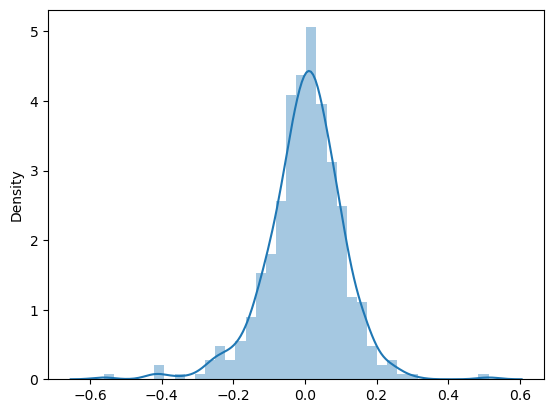

In [331]:
res = y_train - y_train_pred
sns.distplot(res)

In [332]:
#as we see above, the mean is around zero. SO model looks good

##### Step 5: Prdictioon and Evaluation on test dataset

In [333]:
#scale test data set- same as train set
#1 create numeric variables list
num_vars=['atemp', 'hum','windspeed', 'cnt']
#2 fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [334]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
y_test = df_test.pop('cnt')
X_test = df_test

In [336]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [337]:
#columns in X_train_sm
X_train_sm.columns

Index(['const', 'yr', 'spring', 'winter', '6', '9', 'Sunday', 'Light Snow',
       'Mist', '10', '4', '8', 'Monday'],
      dtype='object')

In [338]:
X_test_sm = X_test_sm[X_train_sm.columns]

In [339]:
X_test_sm.columns

Index(['const', 'yr', 'spring', 'winter', '6', '9', 'Sunday', 'Light Snow',
       'Mist', '10', '4', '8', 'Monday'],
      dtype='object')

In [340]:
y_test_pred = lr_model.predict(X_test_sm)

In [341]:
r2_score(y_true=y_test, y_pred = y_test_pred)

0.7872286399960899

##### Conclusion
We see, the demand for bike is dependent on following columns
yr -> +ve impact
spring -> -ve impact
winter -> -ve impact
Month 6 -> +ve impact
month 9 -> +ve impact
Sunday -> -ve impact
light Snow-> -ve impact
Mist -> -ve impact
month 10 -> +ve impact
month 4 -> -ve impact
month 8 -> +ve impact
Monday -> -ve impact

So, bike demand would increase in months 6, 9, 8 and 10
Bike demand decreases -> on Sundays, Mondays, Spring, winter, or when it snows or mist weather conditions. 